# Regression Tree

In [19]:
import pandas as pd
import numpy as np

from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor 
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

import graphviz
import matplotlib.pyplot as plt

## Load the data

In [46]:
regression_label = 'habitat_richness'
folder = "../Dataset"
file = "/finland_out_closest_point_mean_handle_custom_set.csv"

df = pd.read_csv(folder + file, index_col=['longitude', 'latitude'])
#df = df[df[regression_label] > 0]
y = df[regression_label].values
X = df.drop(columns=[regression_label]).values #returns a numpy array

df.head()

habitat_richness        NDVI  ALBH-AL-BH-BB  \
longitude latitude                                                
25.00     67.03             0.206254  135.000000         1190.0   
25.01     67.01             0.257198  165.888889         1271.0   
          67.03             0.206254  149.888889         1155.0   
          67.04             0.206254  145.333333         1200.0   
25.02     67.02             0.206254  166.000000         1198.0   

                    ALBH-AL-BH-NI  ALBH-AL-BH-VI  ALDH-AL-DH-BB  \
longitude latitude                                                
25.00     67.03            1770.5          385.0         1161.0   
25.01     67.01            1882.0          420.0         1255.0   
          67.03            1712.0          384.0         1122.0   
          67.04            1791.0          369.0         1164.0   
25.02     67.02            1786.0          380.0         1151.0   

                    ALDH-AL-DH-NI  ALDH-AL-DH-VI  DMP-RT6-DMP  FAPAR300-FAPAR  \
longitude latitude                                                              
25.00     67.03            1721.0          380.0       3502.5      108.750000   
25.01     67.01            1855.0          413.0       3213.0      111.111111   
          67.03            1674.0          351.0       3812.0      116.777778   
          67.04            1741.0          349.0       3827.0      118.555556   
25.02     67.02            1715.0          365.0       3399.0      106.500000   

                    ...        ssr        str        sp       ssrd  \
longitude latitude  ...                                              
25.00     67.03     ...  6191994.0 -3533157.8  99186.53  7848361.0   
25.01     67.01     ...  6191994.0 -3533157.8  99186.53  7848361.0   
          67.03     ...  6191994.0 -3533157.8  99186.53  7848361.0   
          67.04     ...  6191994.0 -3533157.8  99186.53  7848361.0   
25.02     67.02     ...  6191994.0 -3533157.8  99186.53  7848361.0   

                          strd        tp     swvl1     swvl2     swvl3  \
longitude latitude                                                       
25.00     67.03     24666998.0  0.001808  0.649113  0.649609  0.649762   
25.01     67.01     24666998.0  0.001808  0.649113  0.649609  0.649762   
          67.03     24666998.0  0.001808  0.649113  0.649609  0.649762   
          67.04     24666998.0  0.001808  0.649113  0.649609  0.649762   
25.02     67.02     24666998.0  0.001808  0.649113  0.649609  0.649762   

                       swvl4  
longitude latitude            
25.00     67.03     0.669249  
25.01     67.01     0.669249  
          67.03     0.669249  
          67.04     0.669249  
25.02     67.02     0.669249  

[5 rows x 47 columns]

## Data preparation

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Normalize the data
X_scaler = preprocessing.MinMaxScaler()
y_scaler = preprocessing.MinMaxScaler()


# Test values have to be normalized with the training mean and std
y_scaler.fit(y_train.reshape(-1, 1))
y_train = y_scaler.transform(y_train.reshape(-1, 1)).ravel()
y_test = y_scaler.transform(y_test.reshape(-1, 1)).ravel()
y = y_scaler.transform(y.reshape(-1, 1)).ravel()
X_scaler.fit(X_train)
X_train = X_scaler.transform(X_train)
X_test = X_scaler.transform(X_test)
X = X_scaler.transform(X)

In [48]:
clfXtrain = RandomForestRegressor(n_estimators=100, max_depth=None)
clfXtrain = clfXtrain.fit(X_train,y_train)
print("Random Forest validation score: ", clfXtrain.score(X_test, y_test))

Random Forest validation score:  0.7284017153712123


## Feature importances

The random forest model will identify the features which have been most useful to the prediction. Visualizing these features will help to understand which are the factors that mostly influence the biodiversity of the considered habitat

Feature ranking:
1. feature strd (0.106115)
2. feature lai_lv (0.067292)
3. feature ssrd (0.055952)
4. feature swvl4 (0.050414)
5. feature tp (0.044388)
6. feature SWI1km-SWI-100 (0.032001)
7. feature str (0.027372)
8. feature NDVI (0.026468)
9. feature slhf (0.026433)
10. feature sp (0.025041)
11. feature DMP-RT6-DMP (0.024379)
12. feature swvl3 (0.024286)
13. feature SWI1km-SWI-002 (0.023322)
14. feature fal (0.023053)
15. feature swvl2 (0.023021)
16. feature swvl1 (0.021896)
17. feature ssr (0.021861)
18. feature skt (0.019163)
19. feature TOCR-REF-NOR-SWIR (0.018074)
20. feature src (0.017545)
21. feature d2m (0.017224)
22. feature stl3 (0.016497)
23. feature SWI1km-SWI-005 (0.016291)
24. feature TOCR-REF-NOR-NIR (0.016272)
25. feature TOCR-REF-NOR-BLUE (0.016157)
26. feature stl4 (0.016035)
27. feature t2m (0.015933)
28. feature stl1 (0.015863)
29. feature FCOVER300-FCOVER (0.015685)
30. feature GDMP300-RT5-GDMP (0.015555)
31. feature SWI1km-SWI-060 (0.014429)
32. feature lai_hv (

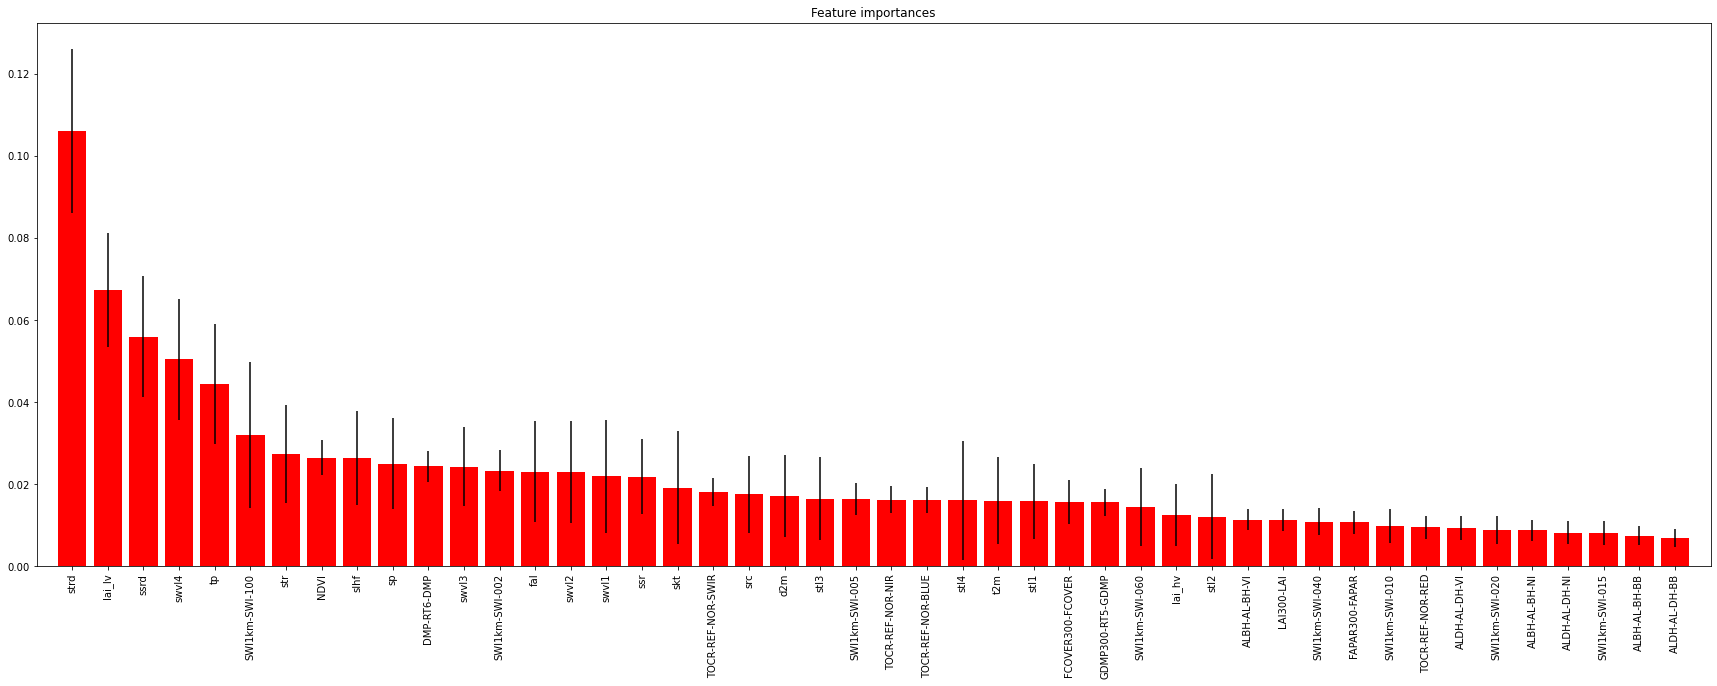

In [49]:
importances = clfXtrain.feature_importances_
std = np.std([tree.feature_importances_ for tree in clfXtrain.estimators_],axis=0)
indices = np.argsort(importances)[::-1]

feat_names = list(df.drop(columns=[regression_label]).columns.values) 

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %s (%f)" % (f + 1, feat_names[indices[f]], importances[indices[f]]))

names = [feat_names[i] for i in indices]
# Plot the impurity-based feature importances of the forest
plt.figure(figsize=(30, 10))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
        color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), names, rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()


In [50]:
imp_index = np.argsort(importances)[::-1]
imp = np.sort(importances)[::-1]

num_feats = 10
print("The first", num_feats, "features contribute to the",  np.cumsum(imp)[num_feats], "of the result")
print("These features are:")
names[:num_feats]

The first 10 features contribute to the 0.4858558162916941 of the result
These features are:


['strd',
 'lai_lv',
 'ssrd',
 'swvl4',
 'tp',
 'SWI1km-SWI-100',
 'str',
 'NDVI',
 'slhf',
 'sp']

## Remove least important features

After determining the importance of each feature through random forest, removing the least important ones improves the performace of a single regression tree

In [51]:
# Select only the 30 most important features
num_feats = 10 # number of retained features
remove_f = names[:num_feats]

# Prepare the data
y = df[regression_label].values
# Select only the most important features in X
X = df.drop(columns=[regression_label])[remove_f].values #returns a numpy array
# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
# Normalize the data
X_scaler = preprocessing.MinMaxScaler()
y_scaler = preprocessing.MinMaxScaler()
# Test values have to be normalized with the training mean and std
y_scaler.fit(y_train.reshape(-1, 1))
y_train = y_scaler.transform(y_train.reshape(-1, 1)).ravel()
y_test = y_scaler.transform(y_test.reshape(-1, 1)).ravel()
y = y_scaler.transform(y.reshape(-1, 1)).ravel()
X_scaler.fit(X_train)
X_train = X_scaler.transform(X_train)
X_test = X_scaler.transform(X_test)
X = X_scaler.transform(X)
X_train.shape

(14171, 10)

### Train a decision tree with the remaining features

It is important to choose a good value for the max_depth of the tree, because trees too deep tend to overfit. So far the best result has been obtained with a max_depth of 7.

In [ ]:
decision_tree = tree.DecisionTreeRegressor(max_depth=5)
decision_tree = decision_tree.fit(X_train,y_train)
print("Regression Tree model score: ", decision_tree.score(X_test, y_test))

plt.figure()
tree.plot_tree(decision_tree)
plt.show()

Regression Tree model score:  0.2539470433164325


## Tree visualization

Once the graph has been exported to a .dot file, graphical renderings can be generated using, for example:
```
$ dot -Tpng tree.dot -o tree.png    (PNG format)
```

In [43]:
feat_names = list(df.drop(columns=[regression_label]).columns.values) 
dot_data = tree.export_graphviz(decision_tree,out_file='tree.dot',feature_names=remove_f, filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(dot_data)

### Dtreeviz visualization

Dtreeviz offers a great way to produce tree visualization with a lot of insight of how the mdoel takes decisions. 

In [9]:
from dtreeviz.trees import *
viz = dtreeviz(decision_tree,
               X_train,
               y_train,
               target_name='habitat_richness',
               feature_names=names)
viz.view()

## Prediction Path

The following visualization shows how the tree chooses a path when obtaining the regression. This kind of plot could be useful in a real-case scenario, because if the model makes a warning prediction it would be useful to understand the features it considered.

In [10]:
X = X_train[np.random.randint(0, len(X_train)),:]  # random sample from training

viz = dtreeviz(decision_tree,
               X_train,
               y_train,
               target_name='habitat_richness',
               orientation ='LR',  # left-right orientation
               feature_names=names,
               X=X)  # need to give single observation for prediction

viz.view()

## Testing Random Forest with less features

In [30]:
clfXtrain = RandomForestRegressor(n_estimators=100, max_depth=None)
clfXtrain = clfXtrain.fit(X_train,y_train)
print("Random Forest validation score: ", clfXtrain.score(X_test, y_test))

Random Forest validation score:  0.8803306077485716
